In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
df = pd.read_csv('psychological_state_dataset.csv')

In [15]:
df.head()

,ID,Time,HRV (ms),GSR (μS),EEG Power Bands,Blood Pressure (mmHg),Oxygen Saturation (%),Heart Rate (BPM),Ambient Noise (dB),Cognitive Load,Mood State,Psychological State,Respiration Rate (BPM),Skin Temp (°C),Focus Duration (s),Task Type,Age,Gender,Educational Level,Study Major
0,1,2024-01-01 00:00:00,33.039739,1.031806,"[0.7583653347946298, 1.423247998317594, 0.6157...",114/79,98.433312,98,56.863054,Low,Anxious,Stressed,21,34.566484,27,Exam,22,Female,Postgraduate,Engineering
1,2,2024-01-01 00:00:01,49.914651,1.340983,"[0.5520419333516282, 1.858065835142619, 0.3766...",113/86,98.944505,70,45.343430,Low,Neutral,Stressed,21,35.358593,282,Assignment,23,Male,Undergraduate,Arts
2,3,2024-01-01 00:00:02,67.894401,1.006014,"[1.0261365005886114, 1.3504934190994182, 2.308...",124/74,95.990753,91,50.029264,High,Sad,Relaxed,17,34.359495,50,Group Discussion,18,Female,Postgraduate,Arts
3,4,2024-01-01 00:00:03,34.705373,0.849270,"[1.6075723109471591, 1.6619672129812242, 0.344...",120/73,98.173643,95,60.802104,Low,Neutral,Anxious,12,34.802638,223,Exam,28,Female,High School,Engineering
4,5,2024-01-01 00:00:04,52.896549,0.879084,"[1.055003922514022, 0.7643319894343756, 1.0745...",111/80,96.225051,65,40.696384,High,Anxious,Stressed,14,35.869862,201,Group Discussion,24,Female,High School,Engineering


In [19]:
df.columns

Index(['ID', 'Time', 'HRV (ms)', 'GSR (μS)', 'EEG Power Bands',
       'Blood Pressure (mmHg)', 'Oxygen Saturation (%)', 'Heart Rate (BPM)',
       'Ambient Noise (dB)', 'Cognitive Load', 'Mood State',
       'Psychological State', 'Respiration Rate (BPM)', 'Skin Temp (°C)',
       'Focus Duration (s)', 'Task Type', 'Age', 'Gender', 'Educational Level',
       'Study Major'],
      dtype='object')

In [25]:
df[['Systolic BP', 'Diastolic BP']] = df['Blood Pressure (mmHg)'].str.split('/', expand=True).astype(float)

In [33]:
df.isnull().sum()

ID                        0
Time                      0
HRV (ms)                  0
GSR (μS)                  0
EEG Power Bands           0
Blood Pressure (mmHg)     0
Oxygen Saturation (%)     0
Heart Rate (BPM)          0
Ambient Noise (dB)        0
Cognitive Load            0
Mood State                0
Psychological State       0
Respiration Rate (BPM)    0
Skin Temp (°C)            0
Focus Duration (s)        0
Task Type                 0
Age                       0
Gender                    0
Educational Level         0
Study Major               0
Systolic BP               0
Diastolic BP              0
dtype: int64

In [40]:
data_cleaned = df.drop(columns=['ID', 'Time', 'Blood Pressure (mmHg)', 'Task Type'])

In [44]:
df.head

<bound method NDFrame.head of        ID                 Time   HRV (ms)  GSR (μS)  EEG Power Bands  \
0       1  2024-01-01 00:00:00  33.039739  1.031806         0.932461   
1       2  2024-01-01 00:00:01  49.914651  1.340983         0.928904   
2       3  2024-01-01 00:00:02  67.894401  1.006014         1.561800   
3       4  2024-01-01 00:00:03  34.705373  0.849270         1.204558   
4       5  2024-01-01 00:00:04  52.896549  0.879084         0.964624   
..    ...                  ...        ...       ...              ...   
995   996  2024-01-01 00:16:35  73.056208  0.961572         1.344332   
996   997  2024-01-01 00:16:36  60.489220  1.167583         0.880174   
997   998  2024-01-01 00:16:37  60.795800  0.996753         1.096016   
998   999  2024-01-01 00:16:38  42.321587  0.681139         1.328970   
999  1000  2024-01-01 00:16:39  49.005242  1.384472         1.346627   

    Blood Pressure (mmHg)  Oxygen Saturation (%)  Heart Rate (BPM)  \
0                  114/79          

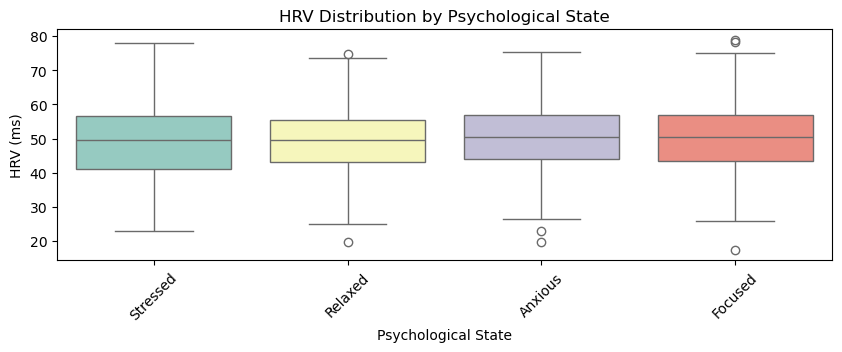

In [58]:
# Visualization 1: HRV distribution by Psychological State
plt.figure(figsize=(10,3))
sns.boxplot(data=data_cleaned, x='Psychological State', y='HRV (ms)', palette='Set3' , hue = 'Psychological State')
plt.title('HRV Distribution by Psychological State')
plt.ylabel('HRV (ms)')
plt.xlabel('Psychological State')
plt.xticks(rotation=45)
plt.show()


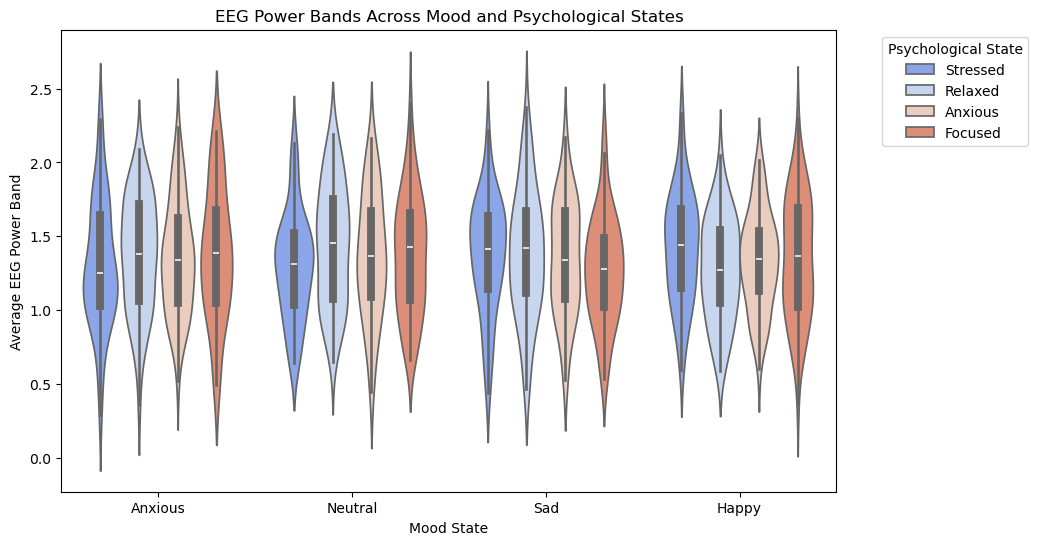

In [86]:
# Visualization 2: EEG Power Bands vs Mood State
plt.figure(figsize=(10, 6))
sns.violinplot(data=data_cleaned, x='Mood State', y='EEG Power Bands', hue='Psychological State', palette='coolwarm')
plt.title('EEG Power Bands Across Mood and Psychological States')
plt.ylabel('Average EEG Power Band')
plt.xlabel('Mood State')
plt.legend(title='Psychological State', bbox_to_anchor=(1.05, 1))
plt.show()

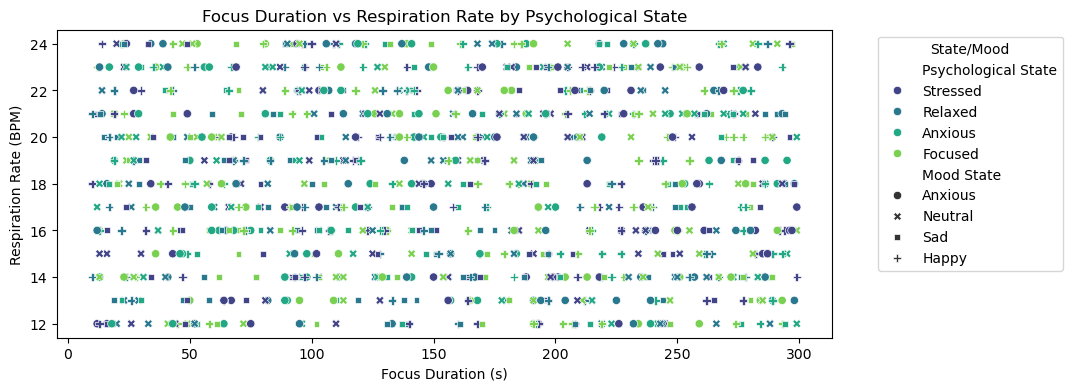

In [98]:
# Visualization 3: Focus Duration vs Respiration Rate
plt.figure(figsize=(10,4))
sns.scatterplot(data=data_cleaned, x='Focus Duration (s)', y='Respiration Rate (BPM)', hue='Psychological State', style='Mood State', palette='viridis')
plt.title('Focus Duration vs Respiration Rate by Psychological State')
plt.xlabel('Focus Duration (s)')
plt.ylabel('Respiration Rate (BPM)')
plt.legend(title='State/Mood', bbox_to_anchor=(1.05, 1))
plt.show()

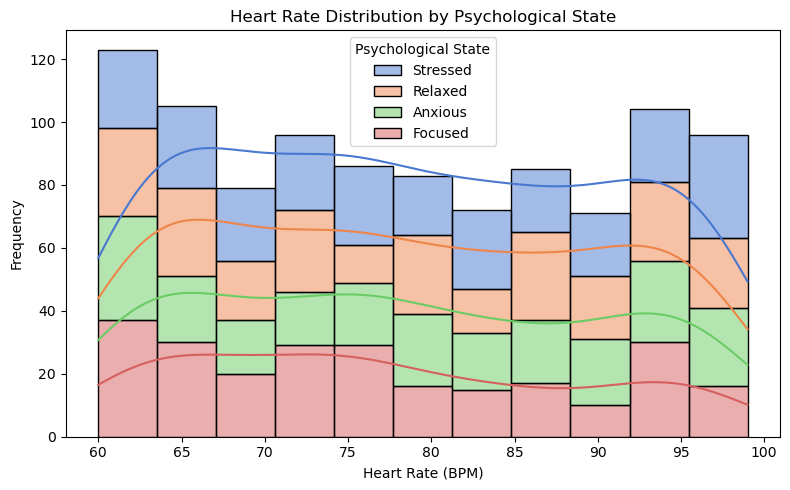

In [190]:
plt.figure(figsize=(8, 5))
sns.histplot(data=data_cleaned, x='Heart Rate (BPM)', hue='Psychological State', kde=True, palette='muted', multiple='stack')
plt.title('Heart Rate Distribution by Psychological State')
plt.xlabel('Heart Rate (BPM)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

C:\Users\pp912\AppData\Local\Temp\ipykernel_21428\1130476577.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data_cleaned, x='Gender', y='Respiration Rate (BPM)', palette='pastel')


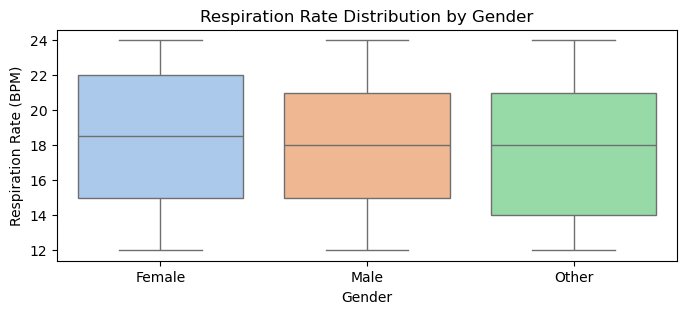

In [156]:
plt.figure(figsize=(8,3))
sns.boxplot(data=data_cleaned, x='Gender', y='Respiration Rate (BPM)', palette='pastel')
plt.title('Respiration Rate Distribution by Gender')
plt.ylabel('Respiration Rate (BPM)')
plt.xlabel('Gender')
plt.show()


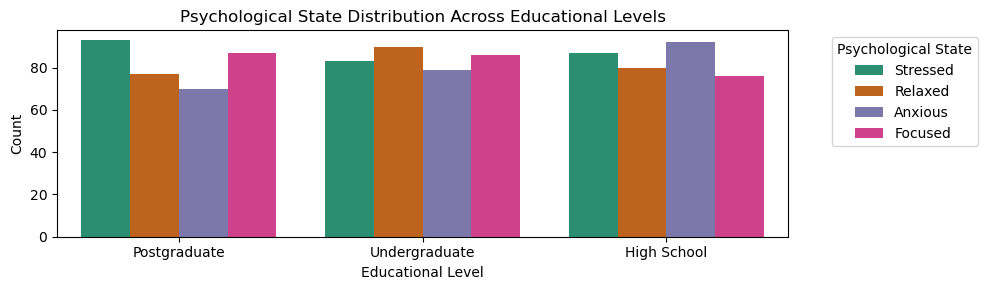

In [184]:
plt.figure(figsize=(10, 3))
sns.countplot(data=data_cleaned, x='Educational Level', hue='Psychological State', palette='Dark2')
plt.title('Psychological State Distribution Across Educational Levels')
plt.ylabel('Count')
plt.xlabel('Educational Level')
plt.legend(title='Psychological State', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

                                                  CONCLUSION
                                                  
The analysis reveals strong links between physiological metrics like HRV, EEG, and psychological states. Elevated stress correlates with higher respiration and lower HRV, while relaxed states show opposite trends. Focus duration and mood significantly influence cognitive load. Insights highlight the potential for data-driven mental health monitoring and tailored stress management solutions.